Author: Jarno - azzipxonraj \
Date Created: 06-03-2025 \
Date Modified: 06-03-2025 \
Description: This jupyter notebook will use machine learning based
on supervised classification data from a heartdisease database.
Research question: Can a model predict based on symptoms if a patient has heartdisease? \
Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data \

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib_venn import venn3
import scipy.stats as stats


## Read the Data


Here i will look at the data to see if anything is broken or if there are any NA's present


In [52]:
df = pd.read_csv("Data/heart.csv")
display(df)
df.shape

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


(918, 12)

This data has different data types like bolean, numerical and strings. It is as the assignment asks a labeled dataset as seen by the HeartDisease columns that either displays 1 (TRUE) or 0 (FALSE) making it suitable for a  supervised classification machine learning model. On the surfrace this data looks usable, now in the following part an analysis will be made if it is actually usable.

In [53]:
df.columns.tolist()


['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

After downloading the dataset it is necesarry to check if our collums match with those shown on the Kagle website.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


df.info() shows how many columns there are, what each collums name is, what the non-null counts is (so how many entries) and the data type for each column. 

To make it easier and check what each collumn contains and what ammount. This is important to know to see if there are inbalances, it also checks the null count incase there are undefineds.



In [55]:
df.isnull().any()


Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

The data gets checked for any NA's and NaN, the df.isnull.any() shows this quickly for each column and there are no missing data values.

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


Here some general statistics get shown for each column that has a numerical value, it shows how many entries (shown before too), it shows the average for each column, the lowest and highest value measuered, the 25%, 50% and 75% and the standard deviation. It is important to know this because it shows the distribution of the data, if there are any outliers and again a quality control. The heart disease mean shows that +55% of people in this dataset have heartsdisease. The minimal for cholesterol is also rather strange because this is not possible, this might call for imputation of the data to solve this. other then that some outliers should be filtered out or also call for the earlier mentioned imputation of the data. 

In [57]:
codebook = {
    "attribute": [
        "Age", "Sex", "ChestPainType", "RestingBP", "Cholesterol", "FastingBS", 
        "RestingECG", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope", "HeartDisease"
    ],
    "unit": [
        "years", "category", "category", "mmHg", "mg/dL", "bool", 
        "category", "bpm", "bool", "ST depression", "category", "bool"
    ],
    "dtype": [
        "int64", "object", "object", "int64", "int64", "int64", 
        "object", "int64", "object", "float64", "object", "int64"
    ],
    "description": [
        "Age of the patient",
        "Sex of the patient (Male/Female)",
        "Type of chest pain experienced (e.g., typical angina, atypical angina, non-anginal, asymptomatic)",
        "Resting blood pressure in mmHg",
        "Serum cholesterol in mg/dL",
        "Fasting blood sugar > 120 mg/dL (1 = true, 0 = false)",
        "Resting electrocardiographic results (e.g., Normal, ST-T wave abnormality, left ventricular hypertrophy)",
        "Maximum heart rate achieved during exercise",
        "Exercise-induced angina (Yes/No)",
        "ST depression induced by exercise relative to rest",
        "Slope of the peak exercise ST segment (e.g., upsloping, flat, downsloping)",
        "Presence of heart disease (1 = Disease, 0 = No disease)"
    ]
}

pd.DataFrame(codebook).set_index("attribute")

,unit,dtype,description
attribute,,,
Age,years,int64,Age of the patient
Sex,category,object,Sex of the patient (Male/Female)
ChestPainType,category,object,"Type of chest pain experienced (e.g., typical ..."
RestingBP,mmHg,int64,Resting blood pressure in mmHg
Cholesterol,mg/dL,int64,Serum cholesterol in mg/dL
FastingBS,bool,int64,"Fasting blood sugar > 120 mg/dL (1 = true, 0 =..."
RestingECG,category,object,"Resting electrocardiographic results (e.g., No..."
MaxHR,bpm,int64,Maximum heart rate achieved during exercise
ExerciseAngina,bool,object,Exercise-induced angina (Yes/No)


To explain to a user that might use the trained algoritm a codebook has been generated, This tells for each attribute what unit it is, the data type that it contains and a description of what it means. The codebook needs to explain to a user that want's to work with this data or with the trained model what every attribute means without having to look into the data specifically. Also a codebook can be used for reproducabilty, letting the next user know how the writer of the logbook interpreted the data.

## EDA (Exploratory Data Analysis)

For building an accurate, trustable and good model overal there needs to be a good insight of what the data is that is being worked with. A exploratory data analysis is to gain insight on what the data contains and or is that is being worked with. Checking if the data is evenly distributed, what factors should play a key role and what factors should have less weight when training the model. If the data isn't evenly distibuted, has errors or outliers that cause problems. The data can be manipulated with imputing or something like one hot encoding to make it more usable and trustable. To see all of this visualisations play a key role, these visualisations can shows patterns, structures in the data and anomalies/ abnormality's.



array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

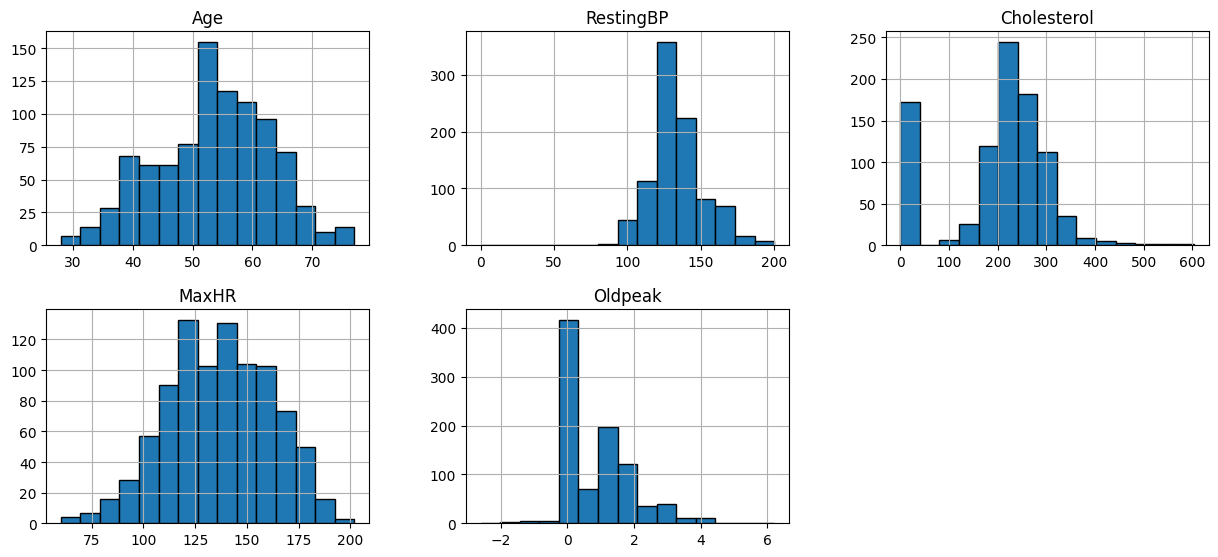

In [58]:
df_numeric = df["Age RestingBP Cholesterol MaxHR Oldpeak".split()]

df_numeric.hist(bins=15, figsize=(15, 10), layout=(3, 3), edgecolor='black')

Here the numeric features are checked for their distribution, an even distribution is key for building a trustable model. Age, Resting bp and Max heart rate all seem te be distrubuted evenly. Old peak that tells us about ST depression induced by exercise relative to rest, is left distrubuted. This can cause trouble with the model being biased, making innacurate predictions and general sub optimal performance. Cholesterol looks to have a significant outlier spike at the 0 mark, this as with Old peak can also cause for problems like sub optimal perfomance and making innacurate predictions. To fix this the data can be transformed using some techniques, these techniques are Log transformation, Box-Cox transformation and Yeo-Johnson Transformation.

Log transformation, is a technique where each data point gets replaced by it's log value. This technique is used to reduce skewness in the data distribution. It makes pattenrs in the dat amore interpretable.
 
Box-Cox transformation, a method that can handle positive and negative skewness quite well. It uses a power transformation parameter (lambda) to find the optimal transformation. This will maximize the normality of the data. It is effective for a wide range of distributions and can be applied to multiple features at the same time.

Yeo-Johnson Transformation, is a simmilair transformation as the Box-Cox however it allows for transformation of both positive and negative values, making it more flexible in practice.

The additional problem with cholesterol: The cholesterol also has allot of 0 values. This is not possible since a cholesterol of 0 is not livable. Therefore the 0's need to be handeled. There are a few options to do this, one being deleting the data. This however is not a good idea because losing data means the final model will be of less quality. So replacing the 0's with an apropriate technique will be more usefull.
A way to do this is **imputation** this replaces the NA's (in this case the 0's) with the median of the other data.

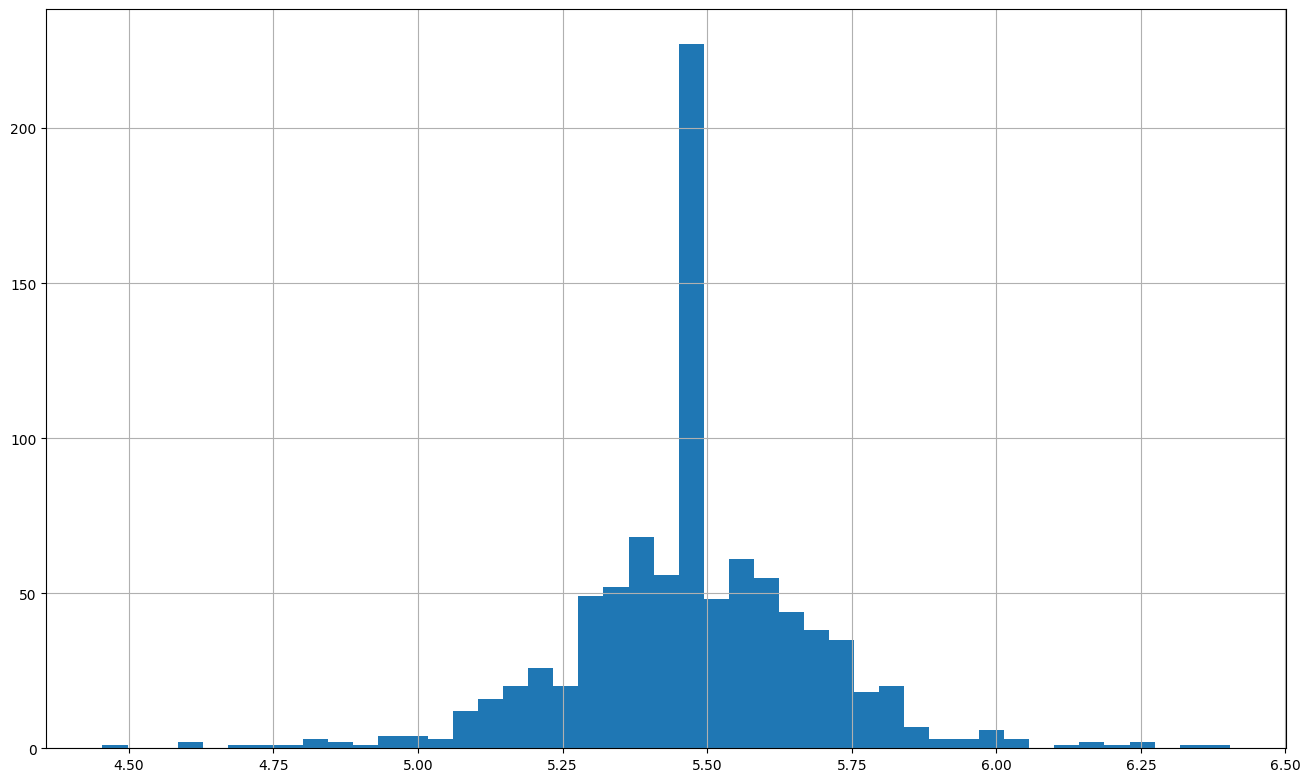

In [59]:
median_cholesterol = df[df['Cholesterol'] != 0]['Cholesterol'].median()
df['Cholesterol_Imputed'] = df['Cholesterol'].replace(0, median_cholesterol)
df['Cholesterol_Imputed_Log'] = np.log1p(df["Cholesterol_Imputed"])
df['Cholesterol_Imputed_Log'].hist(bins=45, figsize=(16.0, 9.6))
plt.show()



The fix to replace the 0's and make the cholesterol les skewed is shown here. First the data was imputed to get rid of the 0's but keep the data. After this, using numpy the data was log transformed causing the data to be more normalized.

In [60]:
df["Cholesterol"].describe().T

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [61]:
df["Cholesterol_Imputed_Log"].describe().T

count    918.000000
mean       5.475700
std        0.210961
min        4.454347
25%        5.370638
50%        5.472271
75%        5.590987
max        6.403574
Name: Cholesterol_Imputed_Log, dtype: float64

Here the old cholesterol data and the new cholesterol data is shown. Cholesterol_Imputed_Log shows a distribution that is more aligned with the assumptions and optimal performance characteristics of many machine learning algorithms due to its reduced skewness and stabilized variance. Therefore the model will be trained with this and the original Cholesterol data will be removed from the dataframe.

In [62]:
df.drop('Cholesterol', axis=1, inplace=True)
df.drop('Cholesterol_Imputed', axis=1, inplace=True)


In [63]:
df.rename(columns={"Cholesterol_Imputed_Log": "Cholesterol"}, inplace=True)
display(df)



,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol
0,40,M,ATA,140,0,Normal,172,N,0.0,Up,0,5.669881
1,49,F,NAP,160,0,Normal,156,N,1.0,Flat,1,5.198497
2,37,M,ATA,130,0,ST,98,N,0.0,Up,0,5.648974
3,48,F,ASY,138,0,Normal,108,Y,1.5,Flat,1,5.370638
4,54,M,NAP,150,0,Normal,122,N,0.0,Up,0,5.278115
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,0,Normal,132,N,1.2,Flat,1,5.579730
914,68,M,ASY,144,1,Normal,141,N,3.4,Flat,1,5.267858
915,57,M,ASY,130,0,Normal,115,Y,1.2,Flat,1,4.882802
916,57,F,ATA,130,0,LVH,174,N,0.0,Flat,1,5.468060


Now cholesterol's distribution is fixed, mentioned before Old peak also had a distribution problems so let's fix that now using the Yeo-Johnson transformation. We cannot use the logp1 function again due to old peak having negative data points.

In [74]:
df['Oldpeak_YeoJohnson'], lambda_yj = stats.yeojohnson(df['Oldpeak'])
display(df['Oldpeak_YeoJohnson'].describe().T)
print(f"Yeo-Johnson lambda for Oldpeak: {lambda_yj}")

count    918.000000
mean       0.580595
std        0.682307
min       -4.526272
25%        0.000000
50%        0.507144
75%        1.064590
max        2.751461
Name: Oldpeak_YeoJohnson, dtype: float64

Yeo-Johnson lambda for Oldpeak: 0.31963665850830686


In [78]:
df.drop('Oldpeak', axis=1, inplace=True)
df.drop('Oldpeak_log', axis=1, inplace=True)

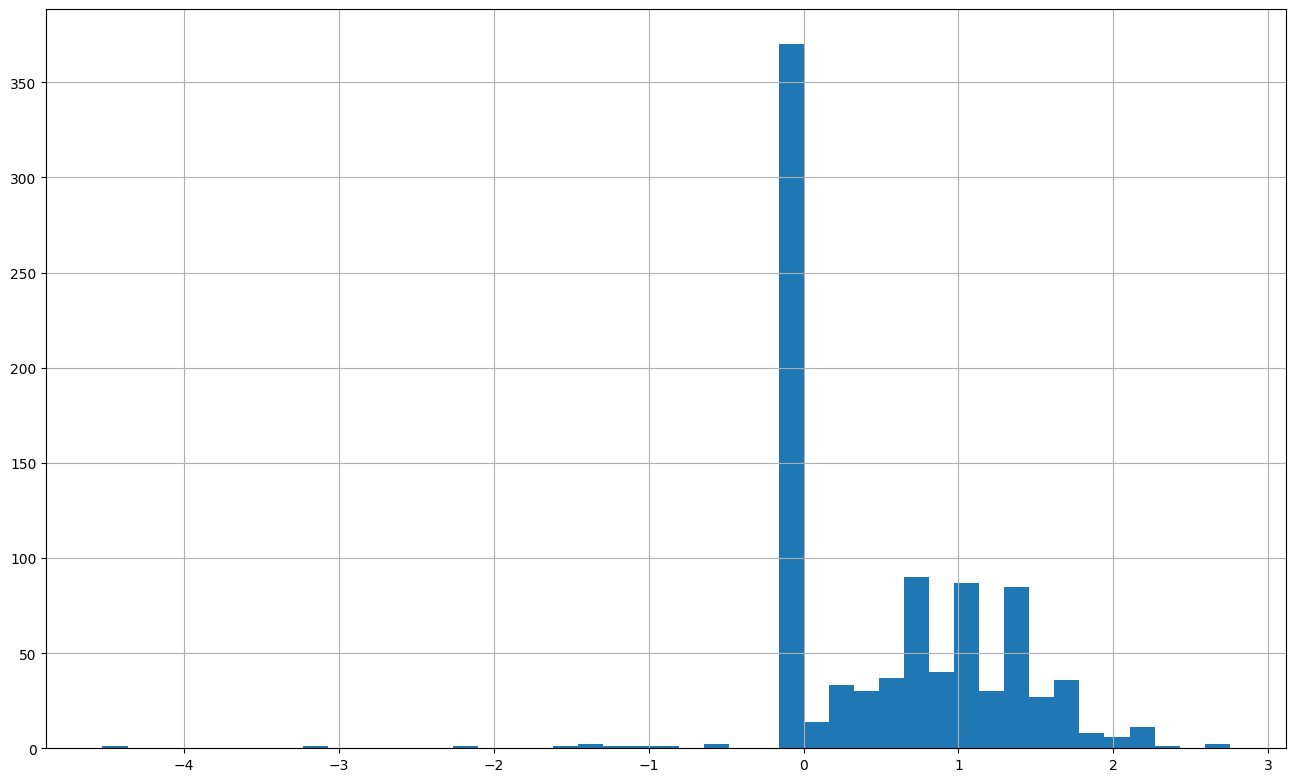

In [79]:
df.rename(columns={"Oldpeak_YeoJohnson": "Oldpeak"}, inplace=True)
df['Oldpeak'].hist(bins=45, figsize=(16.0, 9.6))
plt.show()

After the YeoJohnson transformation the data still seems to have aloot of 0's. However if we look at the biological context these 0's might be very important! A 0 in Oldpeak means no ST depression during exercise. This is a very significant clinical finding! It indicates that the patient did not show this particular sign of ischemia. If the 0's would be replaced with imputation (replacing with a median value of non-zero) the model would be told that a patient who had "no ST depression" actually had "some level of ST depression" this fundamentally changes the clinical meaning of the data and would distort the information. This then could cause more harm to the final model's ability to accurately predict heart disease. For this reason these 0's will be left in the data.


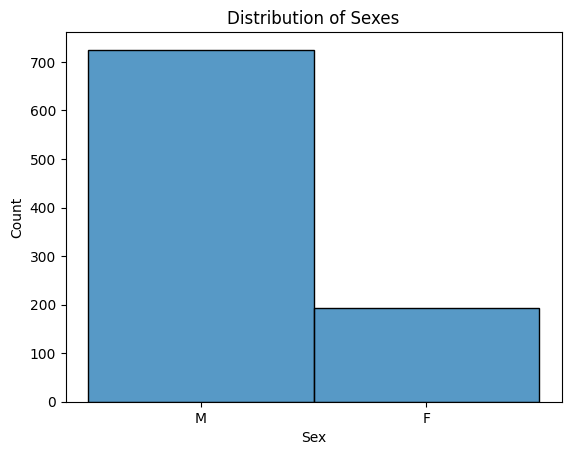

In [12]:
axs = sns.histplot(df["Sex"])
axs.set_title("Distribution of Sexes");

A significant difference is also the 3x larger ammount of male entry's in the dataframe, it is not a good standard to artificially balance the feature distribution itself by creating synthetic female data or removing male data, as this distorts the true underlying population. It is important to note though that the final model will be biased as it will be better to predict heartdisease for the male group then for the female group.

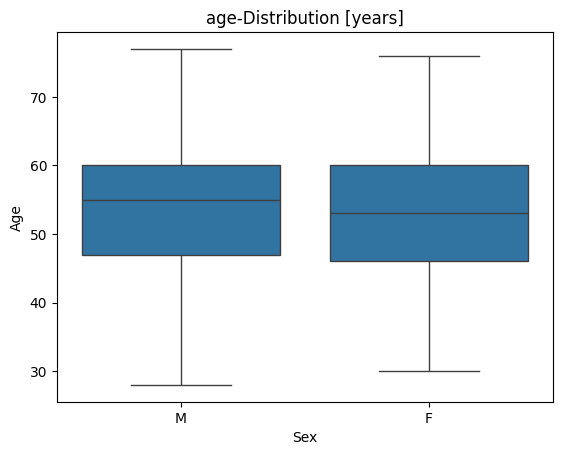

In [80]:
axs = sns.boxplot(data=df, x="Sex", y="Age")
axs.set_title("age-Distribution [years]");

The median age for each sex is about 55-56 for males and 53-54 for the females. There seem to be no major outliers or anomalies age wise meaning this is a usefull feature to use for the final model.

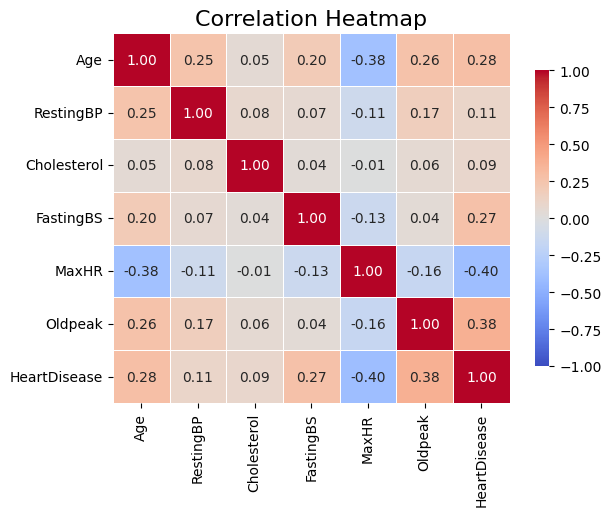

In [ ]:
int_features_df = df[["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak", "HeartDisease"]]
correlation_matrix = int_features_df.corr()

sns.heatmap(
    correlation_matrix,
    annot=True,      # Display the correlation coefficients on the heatmap cells
    fmt=".2f",       # Format the annotations to two decimal places
    cmap="coolwarm", # Use a diverging colormap (like 'coolwarm' or 'RdBu')
                     # 'viridis' is okay, but diverging maps are better for correlations
                    
                    
    vmin=-1,        
    vmax=1,         
    center=0,       

    linewidths=.5,   # Add lines between cells for better visual separation
    cbar_kws={"shrink": .8} # Adjust the size of the colorbar for better fit
)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

**Correlations with HeartDisease**

To see what features should be used to build the initial model it is essentiaal to look for correlation. This both positive and negative.

**MaxHR (Maximum Heart Rate Achieved) and HeartDisease:** There is a strong negative correlation of **-0.40**. This suggests that as MaxHR increases, the likelihood of HeartDisease tends to decrease. Because MaxHR declines naturally with age and is also reduced by cardiovascular problems.

**Oldpeak and HeartDisease:** There is a positive correlation of **0.38**. This indicates that as Oldpeak (ST depression) increases, the likelihood of HeartDisease tends to increase, which is also clinically expected. This is because Clinical studies show that ST depression during exercise testing strongly predicts coronary artery disease and adverse cardiac events (Miranda et al., 1991)

**Age and HeartDisease:** There is a positive correlation of **0.28**. This suggests that as age increases, the likelihood of HeartDisease tends to increase. This is a widely known fact due to the body becoming weaker in general. The immunesystem has a more difficult time fighting off pathogens, bloodpressure problems start to arrise due to your body being worse off disposing of cholesterol and a variaty of other changes that contribute.


**FastingBS (Fasting Blood Sugar) and HeartDisease:** There is a positive correlation of **0.27**. This indicates that higher FastingBS is associated with a higher likelihood of HeartDisease. Blood sugar outside of the normal range when a person is fasted has been associated to an increased risk in cardio vascular disease and strokes. (Park et al., 2013)


**RestingBP (Resting Blood Pressure) and HeartDisease:** There is a weak positive correlation of **0.11**. However Biology and Human anatomy states that a high resting Blood Pressure can cause problems for arteries. These artery problems then lead into Heart attacks and strokes.

**Cholesterol and HeartDisease:** There is a very weak positive correlation of **0.09**. The reason cholesterol has a low positive correlation is because it only increasing the risk and is not a certain for heartdisease.

**Correlations Between Features:**

**Age and MaxHR:** There is a moderate negative correlation of **-0.38**. This is expected, as maximum heart rate typically decreases with age.
**Age and Oldpeak:** There is a positive correlation of **0.26**.
**FastingBS and Oldpeak:** There is a very weak positive correlation of **0.04**.
**Cholesterol and MaxHR:** There is a very weak negative correlation of **-0.01**.

**The most important of these features for the prediction of Heartdisease from this Heatmap**
* Age
* RestingBP
* Cholesterol
* FastingBS
* MaxHR
* Oldpeak



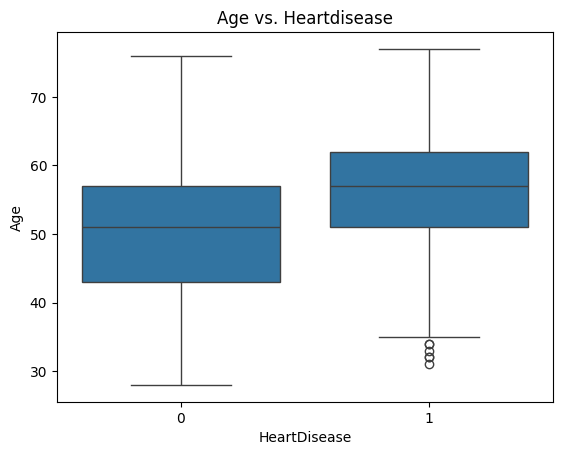

In [89]:
sns.boxplot(x=df['HeartDisease'], y=df['Age'])
plt.title("Age vs. Heartdisease")
plt.show()



The median age (the line inside the box) for individuals with heart disease (group 1) appears to be notably higher than for those without heart disease (group 0). For group 0, the median looks to be around 51-52, while for group 1, it looks closer to 56-57. This says that age is a strong differentiating factor for heart disease. Older patients are more likely to have a heartdisease.

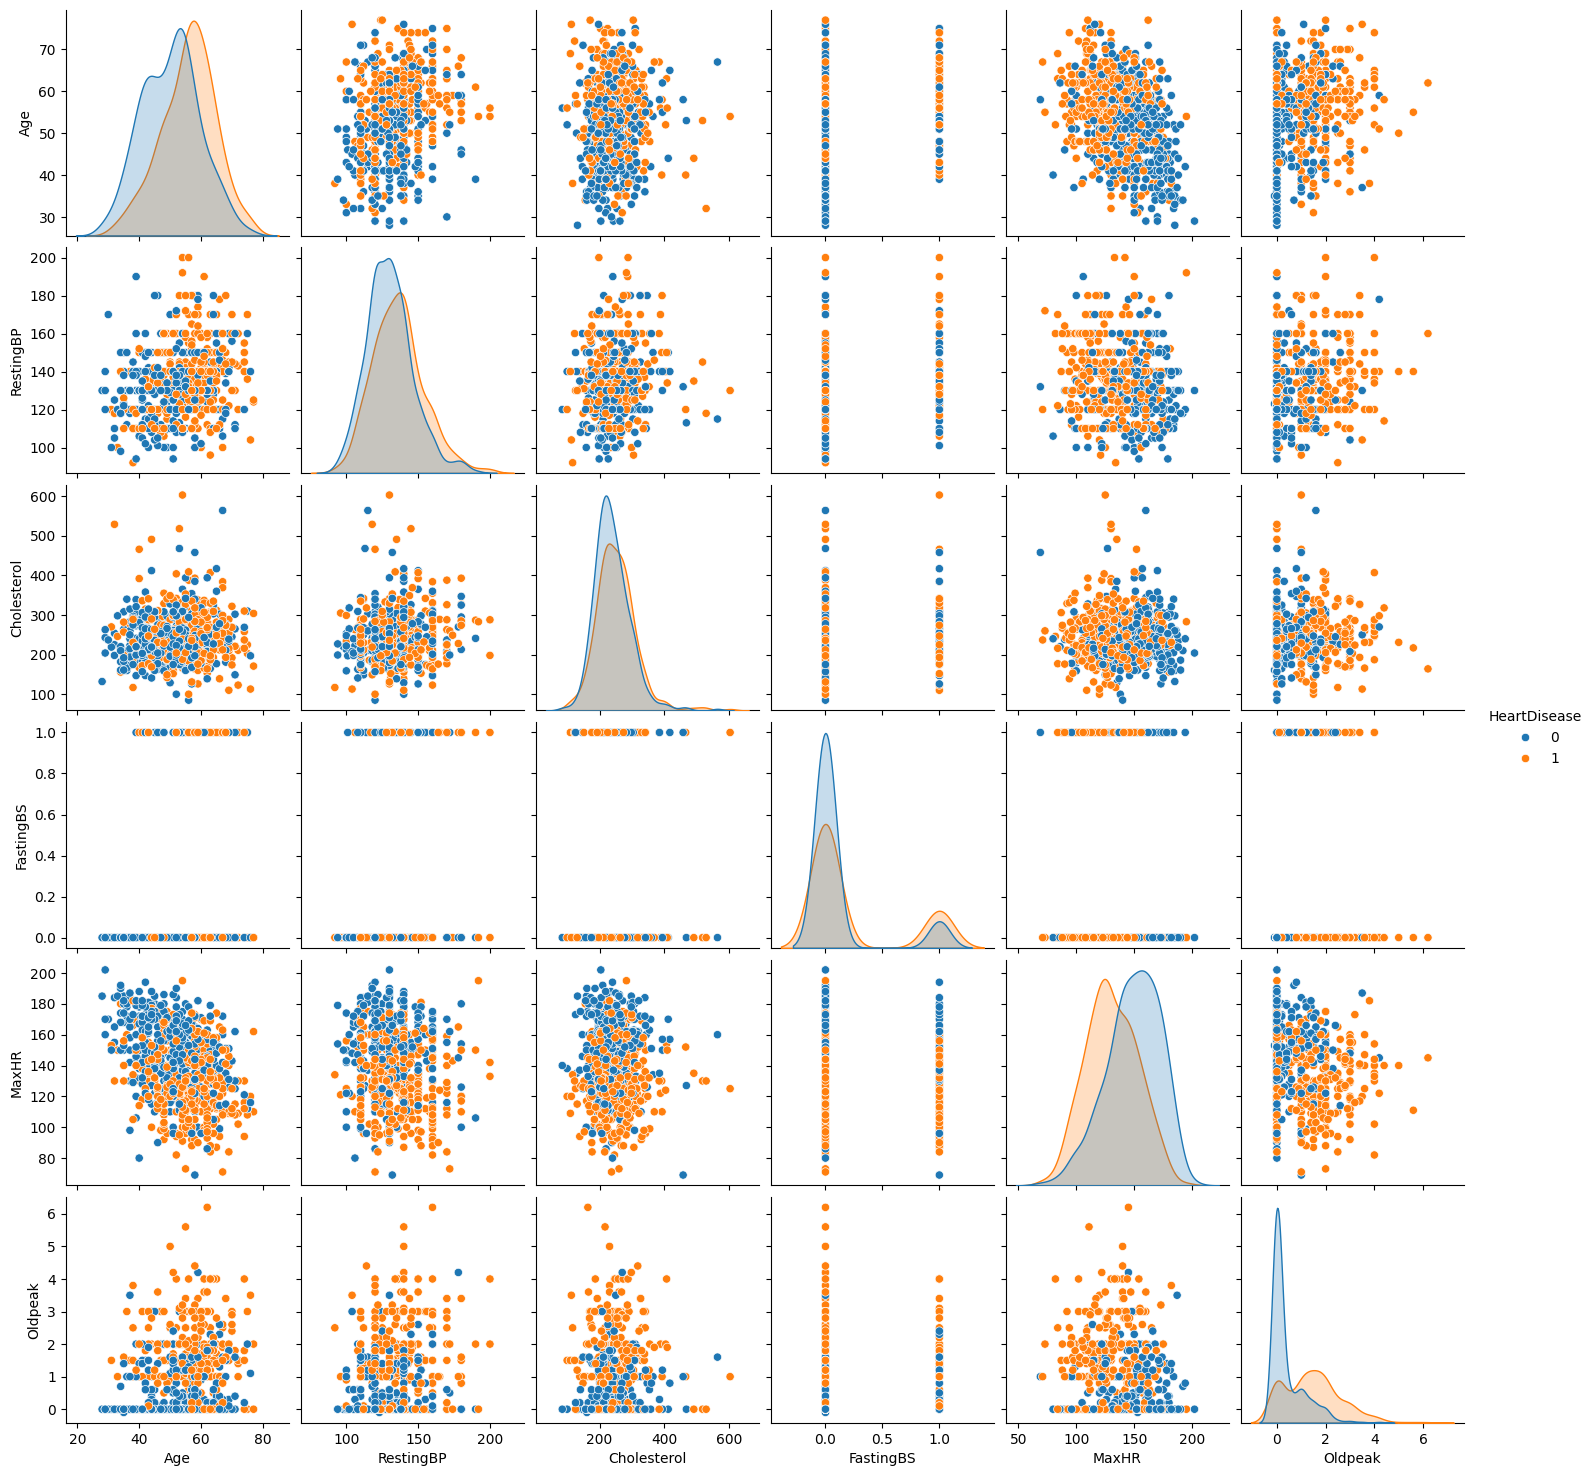

In [88]:
sns.pairplot(df, hue="HeartDisease")
plt.show()


**Most Important Diagonal Plots (Distributions by Target)**

**Age Distribution**: This is one of the most important plots. The orange distribution (HeartDisease=1) is clearly shifted to the right, showing a higher density of older individuals having heart disease compared to the blue distribution (HeartDisease=0).

**MaxHR Distribution**: The orange distribution is shifted to the left (lower values) compared to the blue distribution. This indicates that people with heart disease tend to have a lower maximum heart rate achieved.

**Oldpeak Distribution**: The blue distribution (no heart disease) has a huge spike at 0, while the orange distribution is much more spread out across positive values. This is a very clear separation, indicating that a non-zero Oldpeak value is a strong indicator of heart disease.

**FastingBS Distribution**: This binary feature shows a higher density of orange points at the 1 mark compared to the 0 mark, suggesting that a FastingBS of 1 is associated with heart disease.

**What does this mean for the model** This means that Age is a very strong predictor and this will be an important feature, Maximum Heart Rate Achieved is a highly important feature due to the seperation where low heart rate are more associated with heart disease, especially among older patients. The big difference shown in old peak with a largo spike at 0 for no heart disease vs. spread-out positive values for heart disease makes it a critical feature. The higher concentration of heart disease cases at 1 (A fasting bloodsugar over 120 mg/dL) makes Fasting blood sugar also a valueable predictor.



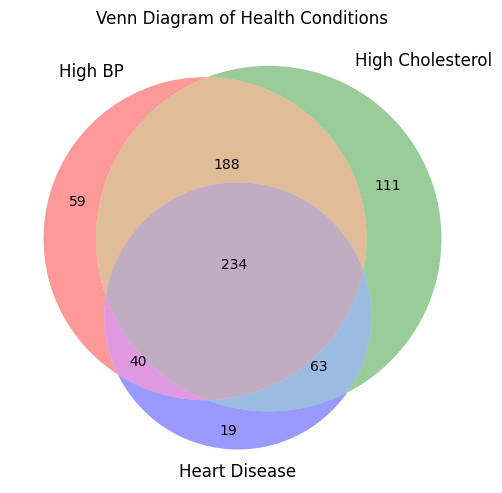

In [89]:

set1 = set(df[df['RestingBP'] > 120].index)  
set2 = set(df[df['Cholesterol'] > 200].index)
set3 = set(df[df['HeartDisease'] == 1].index)


plt.figure(figsize=(6, 6))
venn3([set1, set2, set3], ('High BP', 'High Cholesterol', 'Heart Disease'))


plt.title("Venn Diagram of Health Conditions")

plt.show()



According to the cleveland clinic a heartrate when resting above 100bp could give serious health problems. 
In this venn diagram people are shown that have a resting heart rate above 120 beats per minute, have a cholesterol above 200mg/dL and if they have heart disease or not. it seems that 63 people have high cholesterol and heart disease but no high heartrate. Most people with heart disease do fall in all catagories. (Tachycardia, 2025)

Some other interesting things from this plot are
- 80 patients have heart disease with normal cholesterol and a slightly high heartrate.
- 188 patients have high resting heart beat and high cholesterol yet no heart disease.

<Axes: xlabel='ChestPainType', ylabel='Count'>

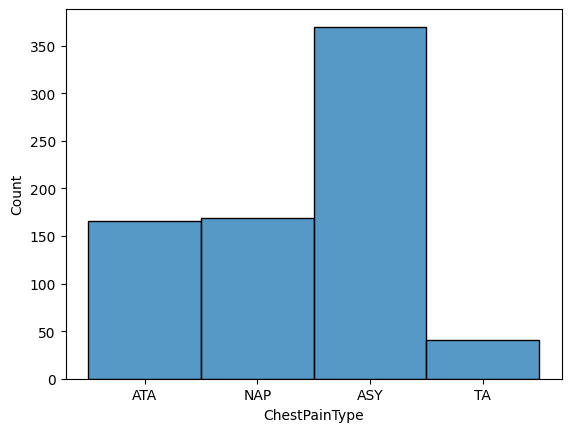

In [90]:
sns.histplot(df["ChestPainType"])

TA: Typical Angina: shortness of breath, nausea, or fatigue disproportionate to the activity level. Typical angina is often described as pressure-like, heaviness, tightness, or squeezing \
ATA: Atypical Angina: A chest pain where it is difficult to say what the specific symtpoms are. \
NAP: Non-Anginal Pain: A chest pain that is less then 5 seconds or over 30 minutes and that increases with resperation. \
ASY: Asymptomatic: Asymptomatic chest pain meaning no prior symptoms or causes 

It seems that Asymtomatic is the most common type of chest pain and Typical Angina is the least common.

In [90]:
pd.crosstab(df['ChestPainType'], df['HeartDisease'], normalize='index') * 100

HeartDisease,0,1
ChestPainType,,
ASY,20.967742,79.032258
ATA,86.127168,13.872832
NAP,64.532020,35.467980
TA,56.521739,43.478261


ChestPainType is a Highly Important Feature: This table unequivocally shows that ChestPainType is an extremely important feature for predicting heart disease. Different categories within this feature have drastically different probabilities of indicating heart disease. if a patient has ASY chest pain, the model will likely predict heart disease with high confidence. If they have ATA, it will likely predict no heart disease. However before implementation the catagorical data needs to be one hot encoded.

In [91]:
pd.crosstab(df['RestingECG'], df['HeartDisease'], normalize='index') * 100

HeartDisease,0,1
RestingECG,,
LVH,43.617021,56.382979
Normal,48.369565,51.630435
ST,34.269663,65.730337


RestingECG is a crucial feature because its categories show distinct probabilities for predicting heart disease. Specifically, ST and LVH findings are strong indicators of heart disease. This feature like the one before needs to be onehot encoded to be able to work with the training of the models.

In [92]:
pd.crosstab(df['ExerciseAngina'], df['HeartDisease'], normalize='index') * 100

HeartDisease,0,1
ExerciseAngina,,
N,64.899452,35.100548
Y,14.824798,85.175202


In [94]:
pd.crosstab(df['ST_Slope'], df['HeartDisease'], normalize='index') * 100

HeartDisease,0,1
ST_Slope,,
Down,22.222222,77.777778
Flat,17.173913,82.826087
Up,80.253165,19.746835


ExerciseAngina is a highly important feature for predicting heart disease due to its very distinct probabilities. The presence of exercise-induced angina ('Y') is a strong indicator, with over 85% of such cases having heart disease. Its absence ('N') is more associated with no heart disease. This clear differentiation means it will be a leverage  for powerful predictions. It will need to be numerically encoded for use.

In [93]:

contingency_sex = pd.crosstab(df["Sex"], df["HeartDisease"])
chi2_sex, p_sex, dof_sex, expected_sex = stats.chi2_contingency(contingency_sex)


contingency_cp = pd.crosstab(df["ChestPainType"], df["HeartDisease"])
chi2_cp, p_cp, dof_cp, expected_cp = stats.chi2_contingency(contingency_cp)


chi2_results = {
    "Sex": {"Chi2": chi2_sex, "p-value": p_sex},
    "ChestPainType": {"Chi2": chi2_cp, "p-value": p_cp}
}

chi2_results

{'Sex': {'Chi2': 84.14510134633775, 'p-value': 4.597617450809164e-20},
 'ChestPainType': {'Chi2': 268.06723902181767,
  'p-value': 8.08372842808765e-58}}

Here there are 2 values for each feature compared to Heartdisease.
We have the Chi2 value, this shows if there is a strong relationship between the variables a high value means strong relation
We have the p-value, this shows if these relations are statisticly significant.

For Sex & Heartdisease we get a chi2 value of about 84.14, and a p value of 4.597617450809164e-20. This high chi value means there is a strong relation between sex and heartdisease and the extremely low p value tells us it is also very significant so this should we put in our model.


For Chestpaintype & Heartdisease we get a chi2 value of about 268.07, and a p value of 8.08372842808765e-58. This very high chi value means there is a very strong relation between sex and heartdisease and the extremely low p value tells us it is also very significant so this should we also be put in our model.

In [95]:
df["HeartDisease"].value_counts(normalize=True)


HeartDisease
0    0.522788
1    0.477212
Name: proportion, dtype: float64

To be able to train a model properely it is optimal to have class balance meaning a 50/50 split of between the two classes. This dataset has almost a 52%/48% split making it quite close to the 50/50. This also means that there is no immediate bias towards one class. When the target classes are severly imbalanced a model can achieve high overall accuracy by prediciting the majority class all the time. But it would perfom poor. on the minority class. Models generally also learn better with a good ammount of examples per class. For severely imbalanced datasets, techniques like oversampling (e.g., SMOTE), undersampling, or using special loss functions are often necessary to prevent the model from ignoring the minority class.


## Conclusion
From this EDA a conclusion can be made of what features are most important when training the final models.
These features being the following:

**Numeric features**
* Age
* RestingBP
* Cholesterol
* FastingBS
* MaxHR
* Oldpeak

**Catagorical features**
* Sex
* ChestPainType

Using these Features a variate of models will be made and their performance will be explored.

## Machinelearning - Training the models


#### Importing used modles and pre processing data


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [100]:

X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]



categorical_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
numerical_cols = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]


preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(drop="first"), categorical_cols)
])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


The data needs to be preprocessed before it can be used, This is because the machinelearning algoritms can't just read these numbers they need to be in a clean and consistent matter. So by preproccesing the data its more machinelearning friendly. 

**StandardScaler** Makes the scale of all numerical catagories the same. 

**OneHotEncoder** Turn's catagories into 0 and 1's to make it machine readable. 

#### Training the models


In [101]:


model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[71 11]
 [12 90]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        82
           1       0.89      0.88      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



RandomForestClassifier has achieved strong performance on the test set! An accuracy of 88% is very good, and the precision, recall, and F1-scores are consistently high for both classes (all above 0.86). This indicates that the model is not only accurate overall but also performs well at identifying both cases of heart disease and cases without heart disease, with good balance. The initial data preprocessing and model choice seem to be working very effectively for this dataset!

In [102]:
svm_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", SVC(probability=True))  
])


svm_params = {
    "classifier__C": [0.1, 1, 10],
    "classifier__kernel": ["linear", "rbf"],
    "classifier__gamma": ["scale", "auto"]
}


svm_grid = GridSearchCV(svm_pipeline, svm_params, cv=5, scoring="accuracy")
svm_grid.fit(X_train, y_train)


y_pred_svm = svm_grid.predict(X_test)
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Confusion Matrix:
[[68 14]
 [13 89]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        82
           1       0.86      0.87      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



**Hyper parameters SVM**
the hyperparameters being tuned via GridSearchCV are C, kernel, and gamma. C is the regularization parameter, balancing classification errors against margin width. kernel defines the decision boundary's shape, specifically tested as linear for straight lines or rbf for more complex, non-linear patterns. Finally, gamma controls the influence of individual training examples on the decision boundary for the rbf kernel, determining how far that influence reaches.

SVM shows a high precision for predicting "No Heart Disease" (0.85) and a very good recall for "Heart Disease" (0.85), meaning it's good at identifying actual heart disease cases while also being precise about healthy ones. The performance is very comparable to  RandomForestClassifier. The Random Forest had a slight edge in overall accuracy (0.88 vs 0.85) and F1-score for class 1 (0.89 vs 0.87). Both models are strong candidates.

In [103]:

logreg_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

logreg_pipeline.fit(X_train, y_train)
y_pred_logreg = logreg_pipeline.predict(X_test)

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_logreg))



Logistic Regression Confusion Matrix:
[[71 11]
 [ 9 93]]
Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



The Logistic Regression model now achieves the highest overall accuracy at 0.89, tying with its precision for both classes. It also boasts the highest recall and F1-score for predicting Heart Disease (Class 1). The Random Forest Classifier is very competitive, with an accuracy of 0.88 and strong F1-scores for both classes.The SVM model also performs very well with 0.85 accuracy and good metrics, particularly its high recall for Class 1.

The Logistic Regression model  appears to be the top performer in terms of overall accuracy and its ability to correctly identify actual heart disease cases (recall for Class 1). 

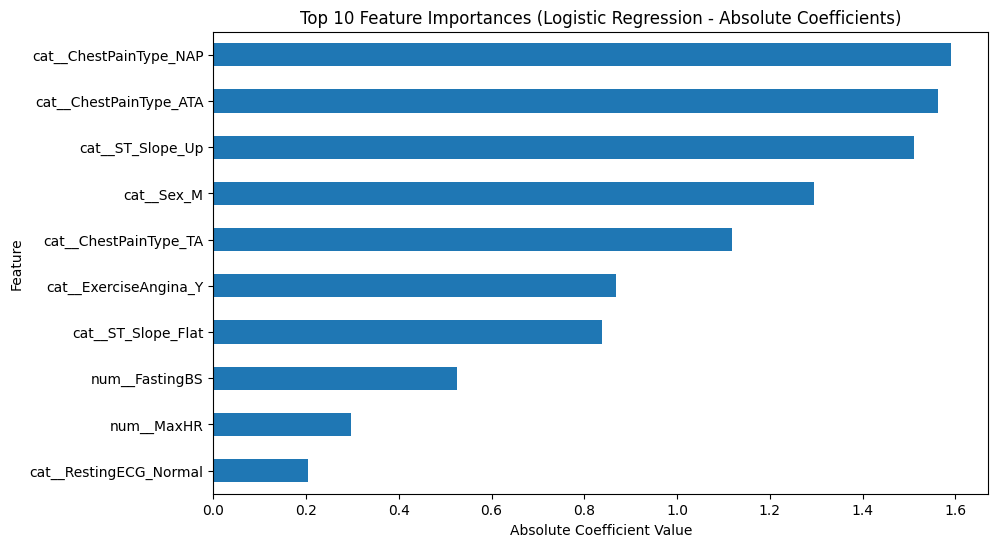

In [105]:
feature_names = logreg_pipeline.named_steps["preprocessor"].get_feature_names_out()
coefficients = logreg_pipeline.named_steps["classifier"].coef_[0]

importances = abs(coefficients)
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6)) # Adjust figure size for better readability if needed
feat_imp.head(10).plot(kind="barh")
plt.title("Top 10 Feature Importances (Logistic Regression - Absolute Coefficients)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.gca().invert_yaxis() # Invert y-axis to have the highest importance at the top
plt.show()

Categorical Features Dominate: It's very clear that the one-hot encoded categorical features (ChestPainType, ST_Slope, Sex, ExerciseAngina, RestingECG) are among the most influential predictors in the Logistic Regression model. Clinical Alignment: The importance of ChestPainType, ST_Slope, and ExerciseAngina strongly aligns with clinical understanding of heart disease risk factors.Numerical Feature Contribution: Numerical features like MaxHR and FastingBS also contribute significantly, though their coefficients are generally smaller than the top categorical ones.


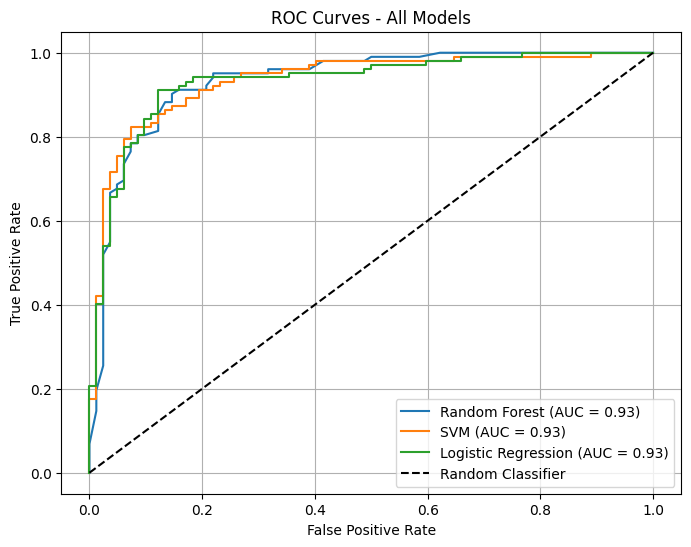

In [ ]:

def plot_roc(model, X_test, y_test, model_name):
    """
    Plots the ROC curve for a given model.

    Args:
        model: Trained scikit-learn classifier (must have a .predict_proba method).
        X_test: Test features.
        y_test: True labels for the test set.
        model_name: Name of the model for the legend.
    """
    # Get predicted probabilities for the positive class (class 1)
    y_score = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_score)

    # Calculate AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Now, using your provided plotting code:
plt.figure(figsize=(8,6))

# Plot ROC for each model using the helper function
# Ensure 'model' refers to your trained RandomForest pipeline
# Ensure 'svm_grid' refers to your trained GridSearchCV object for SVM
# Ensure 'logreg_pipeline' refers to your trained Logistic Regression pipeline

plot_roc(model, X_test, y_test, "Random Forest")
plot_roc(svm_grid, X_test, y_test, "SVM")
plot_roc(logreg_pipeline, X_test, y_test, "Logistic Regression")

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")

# Add labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - All Models")
plt.legend()
plt.grid(True) # Add a grid for better readability
plt.show()


This ROC plot confirms that the models are doing an outstanding job at predicting heart disease. The high and identical AUC scores of 0.93 for Random Forest, SVM, and Logistic Regression indicate that all three models are highly effective discriminators. While earlier classification reports showed minor differences in specific precision/recall values, the ROC curves and AUC scores suggest that, at a broader level of distinguishing between the two classes, their overall predictive capability is remarkably consistent and strong. 

In [109]:
models = {
    "Random Forest": model,
    "SVM": svm_grid.best_estimator_,
    "Logistic Regression": logreg_pipeline,
}

for name, pipeline in models.items():
    scores = cross_val_score(pipeline, X, y, cv=5, scoring="roc_auc")
    print(f"{name}: Mean AUC = {scores.mean():.3f} ± {scores.std():.3f}")


Random Forest: Mean AUC = 0.905 ± 0.046
SVM: Mean AUC = 0.906 ± 0.043
Logistic Regression: Mean AUC = 0.911 ± 0.039


Excellent Overall Performance: All three models demonstrate excellent predictive power, with mean AUC scores well above 0.90. This confirms the high performance we saw in the single ROC curve plot (where all AUCs were 0.93). Logistic Regression Edges Out Others (Slightly): Based on these cross-validation results, Logistic Regression appears to be the best performing model. It has:

* The highest mean AUC (0.911), indicating the best overall discriminatory power on average.

* The lowest standard deviation (±0.039), suggesting its performance is the most consistent and least volatile across different subsets of your data.

Similar Performance with Consistency Differences: While all models perform very similarly in terms of average AUC, the lower standard deviation for Logistic Regression makes it slightly more preferable from a consistency standpoint. This is a fantastic result, showing that even a linear model like Logistic Regression, when combined with good preprocessing, can be highly effective for your heart disease prediction task. Given its simplicity and potentially higher interpretability (from coefficients).

### Conclusion

**Research question**
Can a model predict based on symptoms if a patient has heartdisease?

es, based on known symptoms, machine learning models can be effectively trained to predict if a patient has heart disease. In the case of this dataset, Logistic Regression emerged as the most suitable model, demonstrating the highest overall discriminatory power on average, with a mean AUC of 0.911. Furthermore, it exhibited the most consistent performance, indicated by the lowest standard deviation of AUC scores at ±0.039 across cross-validation folds. This strong performance from a linear model suggests that both the categorical features (like Chest Pain Type, Exercise Angina, and ST_Slope) and numerical features are highly influential, providing clear signals for predicting heart disease.

# Refrences
* Miranda, C. P., Lehmann, K. G., & Froelicher, V. F. (1991). Correlation between resting ST segment depression, exercise testing, coronary angiography, and long-term prognosis. American Heart Journal, 122(6), 1617–1628. https://doi.org/10.1016/0002-8703(91)90279-q
* Park, C., Guallar, E., Linton, J. A., Lee, D., Jang, Y., Son, D. K., Han, E., Baek, S. J., Yun, Y. D., Jee, S. H., & Samet, J. M. (2013). Fasting Glucose Level and the Risk of Incident Atherosclerotic Cardiovascular Diseases. Diabetes Care, 36(7), 1988–1993. https://doi.org/10.2337/dc12-1577
* Tachycardia. (2025, 10 juni). Cleveland Clinic. https://my.clevelandclinic.org/health/diseases/22108-tachycardia
